**Introduccion**

Bienvenido al análisis de datos de Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Este proyecto tiene como objetivo descubrir patrones en la información disponible para comprender mejor las preferencias de los pasajeros y el impacto de factores externos, como el clima, en los viajes. Los insights obtenidos ayudarán a Zuber a posicionarse estratégicamente en el competitivo mercado de los viajes compartidos. el analisis se divide en varios pasos, iniciando por la extraccion de datos del clima en chicago para el año del analisis, luego realizamos una extraccion de datos de SQL (no estara presente en este notebook), finalmente se realiza en este notebook un analisis sobre una informacion que se extrajo de la data base mediantes la lectura de 3 data frames para poder hacer una prueba estadistica y complementar el analisis. 

**Objetivos del Proyecto**

* Exploración de Datos:

    - Importar y estudiar los datos disponibles sobre viajes en taxi en Chicago.
    - Asegurar que los tipos de datos sean correctos y realizar una limpieza de datos si es necesario.
* Análisis Descriptivo:

    - Analizar los datos de los competidores para identificar patrones y tendencias.
    - Visualizar la distribución de viajes por empresa de taxis y los barrios más populares para finalizar los viajes.
* Prueba de Hipótesis:
    
    - Formular y probar una hipótesis sobre el impacto del clima en la duración de los viajes.
    - Evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare cambia en sábados lluviosos.

**Analisis de Datos**

In [13]:
# Importe librerias
import requests
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Definicon de rutas
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
ruta = 'C:/Users/L40527/OneDrive - Kimberly-Clark/Documents/Desarrollo JOB/VS CODE/datasets/Examen_spring_8'

# lectura de datos DF
df_taxis = pd.read_csv(ruta + '/datasets/moved_project_sql_result_01.csv')
df_barrios = pd.read_csv(ruta + '/datasets/moved_project_sql_result_04.csv')
df_trips = pd.read_csv(ruta + '/datasets/moved_project_sql_result_07.csv')

**Lecturas de datos del clima en linea**

En el siguiente apartado, esta el codigo para poder extraer la informacion del clima en linea y poder sumarle mas datos al analisis de las ruytas para los servicios de transportes.

In [14]:
# Extraccion de datos el clima
req = requests.get(url, verify=False)
soup = BeautifulSoup(req.text, 'html.parser')
table = soup.find('table',attrs={"id": "weather_records"})

heading_table = []  
for row in table.find_all('th'):
    heading_table.append(row.text)  

content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
        
weather_records = pd.DataFrame(content, columns=heading_table)

display(weather_records)

c:\Users\L40527\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'practicum-content.s3.us-west-1.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds
...,...,...,...
692,2017-11-29 20:00:00,281.340,few clouds
693,2017-11-29 21:00:00,281.690,sky is clear
694,2017-11-29 22:00:00,281.070,few clouds
695,2017-11-29 23:00:00,280.060,sky is clear


**Analisis de datos**

esta seccion contiene la informacion en la cual ya una vez descargados los archivos de SQL, realizamos analisis de los datos y al final se realiza unas pruebas de hipotesis con el fin de poder concluir de forma robusta para que la empresa pueda posicionarse estratégicamente en el competitivo mercado de los viajes compartidos.

In [15]:
display(df_taxis.head())
print(df_taxis.info())
display(df_barrios.head())
print(df_barrios.info())

df_taxis['company_name'] = df_taxis['company_name'].astype(str)
df_taxis['trips_amount'] = df_taxis['trips_amount'].astype(int)
df_barrios['dropoff_location_name'] = df_barrios['dropoff_location_name'].astype(str)
df_barrios['average_trips'] = df_barrios['average_trips'].astype(int)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips,distribucion
0,Loop,10727,24.805753
1,River North,9523,22.021552
2,Streeterville,6664,15.410230
3,West Loop,5163,11.939229
4,O'Hare,2546,5.887522
5,Lake View,2420,5.596152
6,Grant Park,2068,4.782166
7,Museum Campus,1510,3.491814
8,Gold Coast,1364,3.154195
9,Sheffield & DePaul,1259,2.911387


El número total viajes analizados: 43244


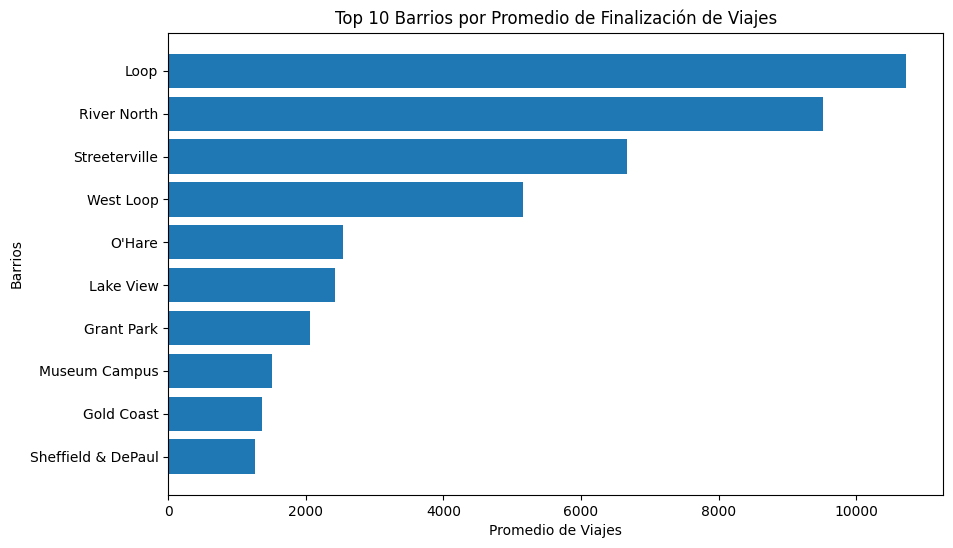

In [16]:
# 10 principales barrios según localizacion de finalización del recorrido
top_10_barrios = df_barrios.nlargest(10, 'average_trips')
total_trips = sum(top_10_barrios['average_trips'])
top_10_barrios['distribucion'] = top_10_barrios['average_trips'] / total_trips * 100
display(top_10_barrios)

print(f'El número total viajes analizados: {total_trips}')


# Grafico del top 10
plt.figure(figsize=(10, 6))
plt.barh(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'])
plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrios')
plt.title('Top 10 Barrios por Promedio de Finalización de Viajes')
plt.gca().invert_yaxis()
plt.show()

**Conclusiones sobre barrios donde mas terminan los viajes**

Segun la data analizada se encuentra que entre el top 10 de lugares donde terminan mas los viajes comaprtidos, se encuentra que entre las primeras 5 empresas esta el pareto de los datos, lo que significa que entre estas empresas administran la mayor cantidad de mercado y la cuota de mercado puede estar entre los sitios que estas empresas trabajan, debemos verlo luego mas a fondo y probar esta hipotesis, por el momento concluimos que estas empresas son las que tiene la mayor parte del mercado. 

,company_name,trips_amount,%_participacion
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasin,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


El top 10 de las empresas con más viajes contiene 72.29719396115388, lo que equivale casi al pareto de los viajes (80%).
El número total de empresas es: 64


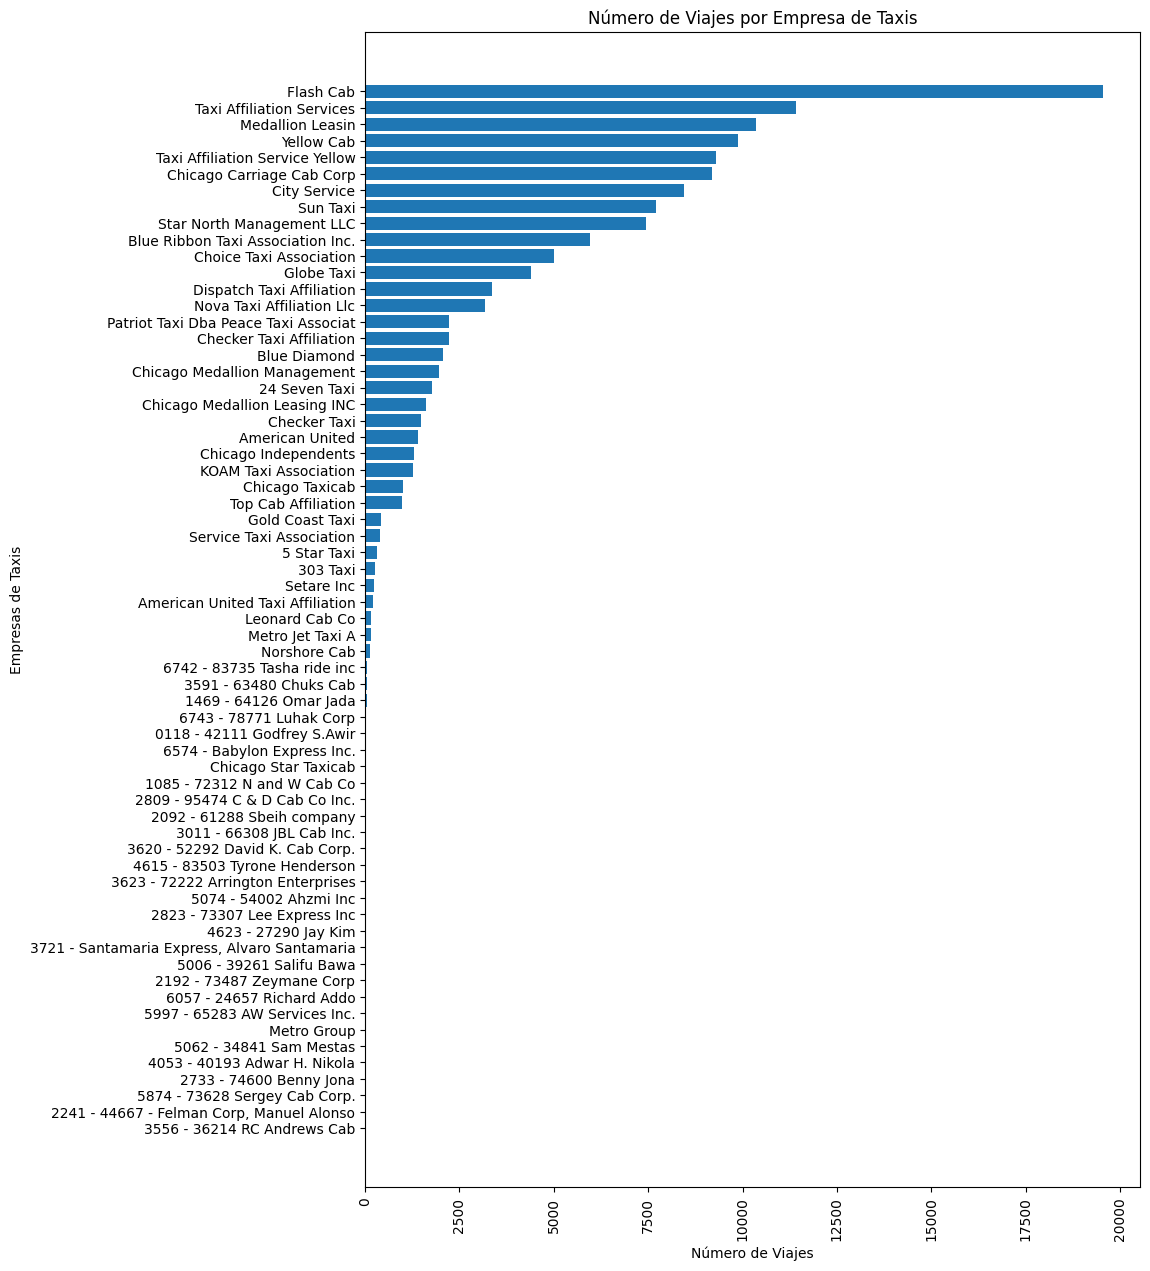

In [17]:
# Numero de viajes por empresas de viajes:
total_trips = sum(df_taxis['trips_amount']) 
top_10_empresas = df_taxis.nlargest(10, 'trips_amount')
top_10_empresas['%_participacion'] = top_10_empresas['trips_amount'] /  total_trips * 100
viajes_top10 = sum(top_10_empresas['%_participacion'])
total_empresas = df_taxis['company_name'].nunique()

display(top_10_empresas)
print(f'El top 10 de las empresas con más viajes contiene {viajes_top10}, lo que equivale casi al pareto de los viajes (80%).')
print(f'El número total de empresas es: {total_empresas}')

plt.figure(figsize=(10, 15))
plt.barh(df_taxis['company_name'], df_taxis['trips_amount'])
plt.ylabel('Empresas de Taxis')
plt.xlabel('Número de Viajes')
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()




**Conclusiones sobre las empresas**

una vez se ha analizado el dataframe de empresas se observa que hay un total de 64 empresas, entre las cuales existen 10 que contienen el 72% de todos los viajes en el timepo analizado, esto significa que la mayoria de viajes estan entre el top 10 de los datos.


**Pruebas de hiptesis**

En esta parte del analisis queremos probar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, teniendo en cuenta el dataframe 'df_trips', para realizar esta prueba una vez cargados los datos, se realiza el analisis de los datos, ajustando formatos y filtrando la informacion segun se requiere, y luego realizo la prueba de hipotesis para lograr concluir sobre el analisis. 

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
Duración promedio de los viajes los sábados lluviosos: 2427.2055555555557
Duración promedio de los viajes en otros días: 2071.7312734082398


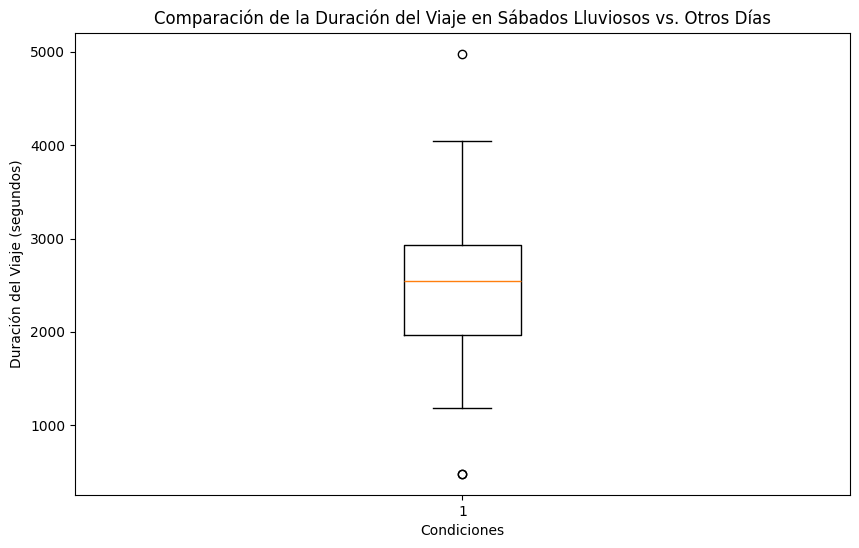

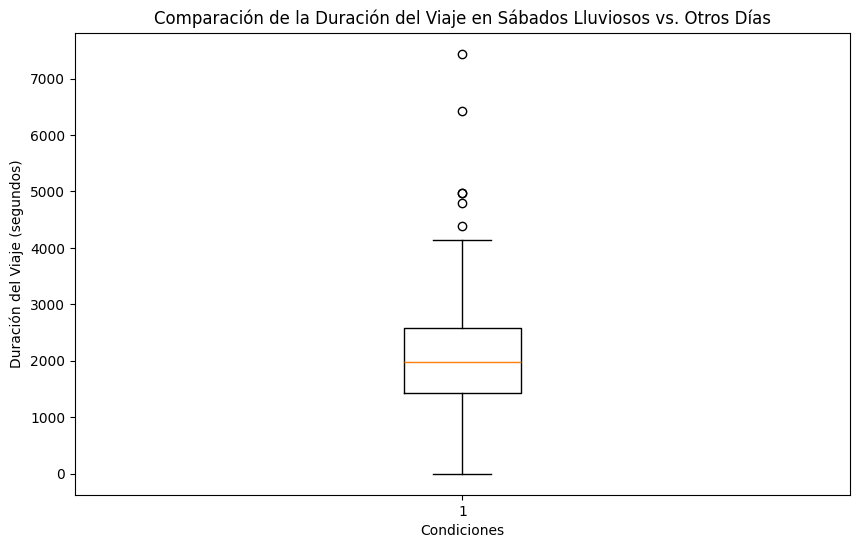

In [18]:
print(df_trips.head())
print(df_trips.info())

# formato de datos:
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])
df_trips['weather_conditions'] = df_trips['weather_conditions'].astype(str)
df_trips['duration_seconds'] = df_trips['duration_seconds'].astype(int)

# Filtrar datos para sábados lluviosos
df_trips['day_of_week'] = df_trips['start_ts'].dt.day_name()
saturday_rainy_trips = df_trips[(df_trips['day_of_week'] == 'Saturday') & (df_trips['weather_conditions'].str.contains('Bad'))]

# Duración promedio  viajes sábados lluviosos
mean_duration_saturday_rainy = saturday_rainy_trips['duration_seconds'].mean()
print(f'Duración promedio de los viajes los sábados lluviosos: {mean_duration_saturday_rainy}')

# Duración promedio de los viajes en otros días
duration_other_days = df_trips[~((df_trips['day_of_week'] == 'Saturday') & (df_trips['weather_conditions'].str.contains('Rain')))]
mean_duration_other_days = duration_other_days['duration_seconds'].mean()
print(f'Duración promedio de los viajes en otros días: {mean_duration_other_days}')

plt.figure(figsize=(10, 6))
plt.boxplot(saturday_rainy_trips['duration_seconds'])
plt.xlabel('Condiciones')
plt.ylabel('Duración del Viaje (segundos)')
plt.title('Comparación de la Duración del Viaje en Sábados Lluviosos vs. Otros Días')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(duration_other_days['duration_seconds'])
plt.xlabel('Condiciones')
plt.ylabel('Duración del Viaje (segundos)')
plt.title('Comparación de la Duración del Viaje en Sábados Lluviosos vs. Otros Días')
plt.show()



**Planteamiento de Hipótesis**

* Hipótesis nula (H0): La duración promedio de los viajes en sábados lluviosos es igual a la duración promedio de los viajes en otros días.

* Hipótesis alternativa (H1): La duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio de los viajes en otros días.

In [19]:
# Nivel de significación (alfa)
alpha = 0.05

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(saturday_rainy_trips['duration_seconds'], df_trips['duration_seconds'], equal_var=False)

print(f"Duración promedio de los viajes en sábados lluviosos: {mean_duration_saturday_rainy}")
print(f"Duración promedio de los viajes en otros días: {mean_duration_other_days}")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")


Duración promedio de los viajes en sábados lluviosos: 2427.2055555555557
Duración promedio de los viajes en otros días: 2071.7312734082398
Estadístico t: 6.056477994870787
Valor p: 5.01365285259947e-09
Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


**Conclusion de pruebas de hipotesis**

segun la informacion proporcionada he decidido realizar una prueba T, debido a que se busca comparar las medias de dos grupos independientes (viajes en sábados lluviosos vs. viajes en otros días) y con esto poder concluir si los tiempos de transito son iguales o diferentes, la prueba se realiza buscando un 95% de confiabilidad, para tener una muestra representativa. 

Segun los datos, la prueba arroja un rechazo de la hipotesis, concluyendo que los sabados lluviosos son valores atipicos en el estudio, lo que significa que para estos casos el tiempo de viaje promedio es mayor que los demas dias de la semana con diferente clima.  

*Conclusiones*

una vez terminado el analisis podemos concluir que el mercado que quiere impulsar la empresa de transportes compartidos *Zuber*, debe ser impulsado de manera correcta ya que la competencia directa que tendria en CHicago son 64 entre las cuales hay 5 empresas que manejan la mayor parte del mercado, adicional a esto se encontro las areas donde mas viajes puede ser unos sitios focos de entrada de mercado), y para finalizar encontramos que los sabado lluviosos se pueden demorar mas los viajes, mas que los demas dias en un clima diferente. 

ademas de este analisis, creoq ue puede generar valor para el negocio poder entender en que zonas esta trabajando mas este top de 5 empresas, muy seguramente estan asociados a un top de pueblos con mas viajes y a su analizar que tanto tiempo puede aumentaar el transito de los viajes cuando los dias son lluviosos, esto para poder implementar una tarifa especial que sea competitiva para que los usuarios puedan accder a este tipo de rutas a un mejor precio que la competencia.
